# Livrable 3
Groupe 7 : Basile Lecouturier, Gaultier Geelen, Jeremy Crosby, Antoine Labat, Martin Cabaud

## L'objectif :

Nous allons devoir créer un algorithme permettant de calculer sur un réseau routier une tournée qui relie un ensemble de points, puis revenir à notre point de départ de manière à minimiser la durée totale de la tournée en fonction du nombre de véhicules. Cette optimisation devra tenir compte du trafic prévu sur chaque axe pour les différentes tranches horaires. Nous proposerons une méthode issue de la recherche opérationnelle pour générer une tournée de livraison correspondant à ce problème. L'implémentation se fera sur une version de base du problème, à laquelle on ajoutera des contraintes supplémentaires. Par ailleurs, nous effectuerons une étude statistique du comportement de notre méthode de résolution, faisant apparaître ses performances (qualité de solution, temps de convergence).

## Probléme de décision :
- Données : Un graphe G hamiltonien, connexe, non complet et non orienté.  
- Objectif : Existe-t-il un chemin hamiltonien pour livrer toutes les adresses de livraison ?

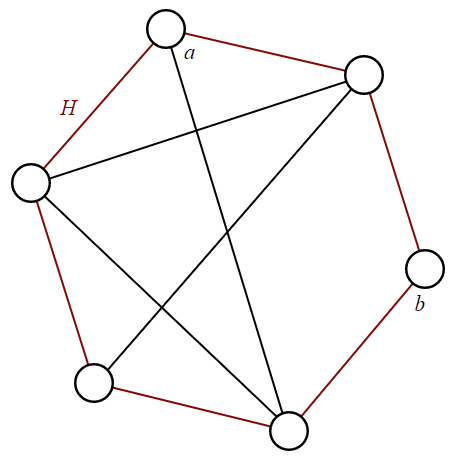

## Les contraintes

- Le livreur ne doit pas travailler plus de 7 heures/jour défini par une plage horaire. 
- Une pause de 5 min toutes les 2 heures afin d’éviter les risques d’accidents.
- Le livreur devra respecter le trafic.


## Problème d’optimisation : 
- Données : Un graphe G hamiltonien, non complet et non orienté.  
- Trouver le plus court chemin entre tous les sommets dans G.


## La solution

Pour résoudre ce problème, nous allons utiliser une solution liée au problème de voyageur de commerce auquel nous allons ajouter nos contraintes :

- pour respecter le trafic, le poids de chaque arête sera calculé à partir de la distance et du trafic pour donner un temps.
- pour les pauses et le temps de travail par jour, nous compterons le temps de travail à partir du poids de chaque arêtes.


## Problématique sous forme mathématique

Nous cherchons ensuite à traduire mathématiquement l'étude de la tournée de livraison. Dans un premier temps, nous définirons les variables du problème puis nous expliquerons à l'aide d'équations les contraintes imposées. 

### Variables

- On a tout d'abord le Graphe hamiltonien et connexe G=(V,E)
- V étant l’ensemble des sommets
- E étant l’ensemble des arêtes, chacune représentée par un temps *t* en fonction d'une distance D en km et un Trafic T en km/h (t = D/T)
- On a le nombre de Livreur N (constante)
- On a le temps de pause p en minutes et qui devra s’exécuter toutes les H heures (toutes deux des constantes)
- On a également le temps de travail maximum par jour Wt en heures (constante)
- On a finalement le temps de travail total TWT en jours:heures:minutes

## Formulation

On déduira donc TWT grâce au problème de voyageur de commerce basé sur le graphe G dont on calculera t pour chaque arête basée sur T et D.
Le voyageur ne pourras pas rouler plus de Wt heures par jour et plus de H heures d'affilée sans faire de pause de p minutes.


## Complexité

D'après nos recherches le problème de voyageur de commerce étant de complexité NP-Difficile. Si on ramène notre problème à celui de voyageur de commerce auquel on ajoute nos contraintes, la complexité de notre problème est donc au moins aussi difficile que ce dernier et rentre dans la classe NP-Difficile.

Quelques ressources :

[Routific](https://blog.routific.com/travelling-salesman-problem)
[tutorialpoint](https://www.tutorialspoint.com/design_and_analysis_of_algorithms/design_and_analysis_of_algorithms_np_hard_complete_classes.htm)
[datavis](https://discord.com/channels/848869642893393930/852919991266836540/854007320681906206)
[Interstice](https://interstices.info/le-probleme-du-voyageur-de-commerce/)
[GeeksforGeeks](https://www.geeksforgeeks.org/proof-that-traveling-salesman-problem-is-np-hard/)

## Méthode de résolution
Pour résoudre ce problème, nous avons choisi d'utiliser l'algorithme glouton. Un algorithme glouton (greedy algorithm en anglais) est un algorithme qui suit le principe de faire, étape par étape, un choix optimum local. Dans certains cas, cette approche permet d'arriver à un optimum global, mais dans le cas général, c'est une heuristique. Une heuristique est une méthode de calcul qui fournit rapidement en temps polynomial une solution réalisable, pas nécessairement optimale, pour un problème d'optimisation NP-difficile.

## Cas de tests
L'illustration ci-dessous montre un cas où l'algorithme glouton est mis en échec.

En partant du point A et en cherchant à monter selon la plus forte pente, un algorithme glouton trouvera le maximum local m, mais pas le maximum global M.

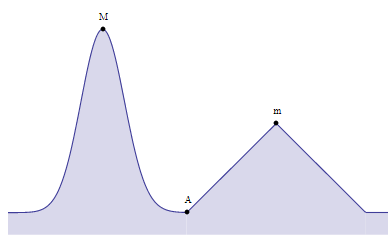



# Statistiques
Première étude : L'objectif est de faire varier le nombre de sommets du graphe et analyser le temps d'exécutution du programme. On pourra ensuite tracer un graphe représentant l'évolution du temps d'exécution en fonction du nombre de sommets. On aura donc X, le nombre de sommets et Y, le temps d'exécution du programme. Finalement, la courbe obtenue est similaire à la fonction exponentielle. On peut donc conclure qu'il s'agit bien d'un problème NP-difficile. 

Seconde étude : L'objectif est de faire varier la densité afin d'obtenir le temps d'exécution. Cependant le nombre de sommets reste fixe. Nous pouvons ainsi tracer l'évolution du temps d'exécution en fonction de la densité et du nombre de sommets. On aura donc X, la densité du graphe et Y, le nombre de sommet.

## Génération du graph / Instanciation du problème

Pour répondre à ces problématiques, nous allons donc nous baser sur un graphe hamiltonien non orienté. Afin d'être sûr de générer un graphe hamiltonien, nous allons nous appuyer sur la théorie de Dirac selon laquelle un graphe de *n* sommets est forcément hamiltonien des lorsque tous les sommets sont de degré *n*/2.

Voici ci-dessous le code de génération du graphe à partir d'un certain nombre de sommets renseigné et influencé par une densité renseigné :

In [5]:
# Import des bibliotéques
import random
import numpy as np
import pymongo
import time
import math
import matplotlib.pyplot as plt


# Initialisation d'une variable globale pour mesure le temps que prend la création du graphe
start = time.time()

# Definition des variables de BDD
bdd_url = "mongodb://localhost:27017/"
base_name = "matrix"
base_collection_name = "vertex"

### Fonction de création du graphe

La fonction suivante va créer un graphe hamiltonien non orienté qui respecte le théorème de Dirac.
Ce graphe demandera deux informations : le nombre de sommets et la densité afin de la respecter le plus possible.

In [56]:
def matrix_generation(nb_vertices, density):
    global start  
    # Démarrage de la mesure du temps
    start = time.time()
    # On créer une matrice binaire aléatoire dont les probabilités sont influencées par la densité renseignée
    matrix = np.random.choice((1, 0), size=(nb_vertices, nb_vertices),
                              p=[(density - 10) / 100, 1 - (density - 10) / 100])
    # On rend la matrice symétrique afin que le graphe ne soit pas orienté
    matrix = np.logical_or(matrix, matrix.T)
    
    
    # On retire les arêtes qui bouclent sur un sommet pour simplifier le travail des algorithmes plus tard
    for i in range(nb_vertices):
        matrix[i][i] = 0
        
        # On liste les arêtes qui ne respectent pas le théorème de Dirac
    not_valid_row = [row_id for row_id, row in enumerate(matrix) if sum(row) < (nb_vertices / 2)]
    while len(not_valid_row) > 0:
        condition_check = False
        row_one = random.choice(not_valid_row)
        # S'il y a plus de deux arêtes qui ne respecte pas le théorème de Dirac, on va essayer de les lier ensemble
        if len(not_valid_row) < 2:
            choice = [row_id for row_id, val in enumerate(matrix[row_one]) if not val and row_id != row_one]
            row_two = random.choice(choice)
        else:  # Quand il ne reste qu'un sommet a compléter on le lie avec un sommet aléatoire du graphe
            temp_not = not_valid_row.copy()
            temp_not.remove(row_one)
            row_two = random.choice(temp_not)
            if matrix[row_one][row_two]:
                choice_row_one = [row_id for row_id, val in enumerate(matrix[row_one]) if not val and row_id != row_one]
                row_two = random.choice(choice_row_one)
            else:
                condition_check = True
        matrix[row_one][row_two] = 1
        matrix[row_two][row_one] = 1
        if sum(matrix[row_one]) >= nb_vertices / 2:
            not_valid_row.remove(row_one)
        if condition_check:
            not_valid_row.remove(row_two)
    return matrix

### Fonction de pondération du graphe
La fonction suivante va servir à pondérer le graphe aléatoirement en fonction de nos contraintes.

In [7]:
def weighting_graph(binary_matrix):
    # On crée une matrice d'objet vide basé sur la matrice binaire
    quantity_vertex = len(binary_matrix)
    object_row = [{}] * quantity_vertex
    object_matrix = []
    for i in range(quantity_vertex):
        object_matrix.append(object_row.copy())
    # On parcourt cette matrice d'objet
    for vertex in range(quantity_vertex):
        for vertex2 in range(vertex + 1):
            # Si les deux sommets sont adjacents alors on génère des poids
            if binary_matrix[vertex][vertex2]:
                distance = random.randint(5, 30)
                tm = random.randint(30, 50)
                ta = random.randint(30, 50)
                temp_data = {
                    "distance": distance,
                    "traffic_morning": tm,
                    "traffic_afternoon": ta
                }
                # On remplit la matrice avec les données générées
                object_matrix[vertex][vertex2] = temp_data
                object_matrix[vertex2][vertex] = temp_data
    return object_matrix

### Remplissage de la BDD
On déclare les fonctions nécessaires au remplissage de la base.

In [8]:
def connect_to_bdd():  # Fonction de connexion à la base
    client = pymongo.MongoClient(bdd_url)
    db = client[base_name]
    return db[base_collection_name]

In [9]:
def empty_collection(collection):  # Fonction pour vider la base
    collection.delete_many({})

In [10]:
def fill_bdd(collection, object_matrix):  # Fonction de remplissage de la base
    
    for id, row in enumerate(object_matrix):  # On crée un objet représentant un sommet pour caque sommet de la matrice
        object_vertex = {
            "id_matrix": id,
            "neighbors": []
        }
        # On remplit la liste des voisins basée sur la matrice
        for neighbor_id, neighbor in enumerate(row):
            if neighbor != {}:
                temp_neighbor = neighbor.copy()
                temp_neighbor["id"] = neighbor_id
                object_vertex["neighbors"].append(temp_neighbor)
                
        # Insertion de l'objet dans la base
        collection.insert_one(object_vertex)

### Execution du code pour la génération du graphe pondéré et insertion dans la bdd

In [11]:
# Génération de la matrice binaire
#Nombre de sommet que nous voulons sur le graphe
nb_vertex = int(input("nombre de sommets du graphe à générer : "))
#Entre 50% et 100%
density = int(input("densité du du graphe entre 50 et 100 % (valeur apprcohé)"))
global_binary_matrix = matrix_generation(nb_vertex,density)
print(global_binary_matrix)
# Pondération du graphe
weighted_graph = weighting_graph(global_binary_matrix)
# Connecter et vider la collection
global_collection = connect_to_bdd()
empty_collection(global_collection)
# Insertion des données dans la collection
fill_bdd(global_collection, weighted_graph)

nombre de sommets du graphe à générer :  10
densité du du graphe entre 50 et 100 % (valeur apprcohé) 50


[[False  True  True False False  True False False  True  True]
 [ True False  True  True  True  True  True  True  True False]
 [ True  True False  True  True  True  True  True  True  True]
 [False  True  True False  True False  True False  True  True]
 [False  True  True  True False  True  True  True False  True]
 [ True  True  True False  True False False False  True  True]
 [False  True  True  True  True False False  True  True False]
 [False  True  True False  True False  True False False  True]
 [ True  True  True  True False  True  True False False False]
 [ True False  True  True  True  True False  True False False]]


---

## Solution au problème de décision
Grace au théorème de Dirac on sait que le graphe est hamiltonien. On va donc chercher une solution dans ce graphe, soit un cycle hamiltonien. Pour ça, nous avons choisi d'appliquer l'algorithme de force brute ou Backtracking. Voici ci-dessous le code permettant de trouver un cycle hamiltonien à partir du graphe dans la base de données en commençant depuis n'importe quel point.

In [12]:
class BackTracking:
    # On déclare ici les variables qui serviront tout le long de l'algorithme
    def __init__(self, collection):
        self.collection = collection  # La collection de la bdd
        self.initial_vertex = {}  # Variable qui contient le sommet de départ
        self.actual_path = []  # Chemin sur lequel l'algorithme travail
        self.saved_path = []  # Cycle final
        self.actual_vertex = {}  # Sommet sur lequel l'algorithme travail
        self.graph_order = int(collection.count_documents({}))  # Ordre du graphe, récupéré depuis la bdd
        self.visited_matrix = np.zeros((self.graph_order, self.graph_order))  # Matrice qui répertorie les pistes a éliminé

    def back_tracking(self,index_vertex):
        self.initial_vertex = self.collection.find_one({"id_matrix": index_vertex})
        # On ajoute le sommet de départ au chemin de travail
        self.actual_path.append(self.initial_vertex["id_matrix"])
        # On défini le sommet de départ comme étant le sommet de travail
        self.actual_vertex = self.initial_vertex
        
        # On continue de chercher une solution tant qu'un cycle finale n'a pas été trouvé
        while len(self.saved_path) < self.graph_order:
            # On dresse une liste des voisin disponible du sommet de travail
            available_neighbors = [val for val in self.actual_vertex["neighbors"]
                                   if not self.visited_matrix[self.actual_vertex["id_matrix"]][val["id"]]
                                   and val["id"] != self.initial_vertex["id_matrix"]
                                   and val["id"] not in self.actual_path
                                   or (self.graph_order == len(self.actual_path)
                                   and val["id"] == self.initial_vertex["id_matrix"])]
            # S'il y a au moins un voisin disponible, on l'ajoute au chemin de travail et on le définie comme étant le sommet de travail actuel
            if len(available_neighbors) > 0:
                self.actual_path.append(available_neighbors[0]["id"])
                self.actual_vertex = self.collection.find_one({"id_matrix": available_neighbors[0]["id"]})
            # S'il n'y a pas de voisin disponible
            else:
                # Dans le cas où le cycle serait complet, on le place dans le chemin final
                if len(self.actual_path) == self.graph_order + 1 and self.actual_path[-1] == \
                        self.initial_vertex["id_matrix"]:
                    self.saved_path = self.actual_path
                else:  # Si le cycle n'est pas complet, on retourne en arrière et on retire le sommet de travail actuel du chemin de travail
                    self.visited_matrix[self.actual_path[-2]][self.actual_vertex["id_matrix"]] = 1
                    for i, _ in enumerate(self.visited_matrix[self.actual_vertex["id_matrix"]]):
                        self.visited_matrix[self.actual_vertex["id_matrix"]][i] = 0
                    self.actual_vertex = self.collection.find_one({"id_matrix": self.actual_path[-2]})
                    self.actual_path.pop(-1)
        return self.saved_path

### Execution du code

In [11]:
#Sommet de départ
index_vertex = 0
back_tracking = BackTracking(global_collection)
global_decisional_solution = back_tracking.back_tracking(int(input("sommet de départ : ")))
print("Voici une solution au problème de décision : " +  str(global_decisional_solution))

sommet de départ :  0


Voici une solution au problème de décision : [0, 1, 2, 3, 7, 4, 5, 6, 9, 8, 0]


## Solution au problème d'optimisation


Pour essayer de trouver le chemin le moins long on va appliquer deux méthodes que l'on compareras ensuites dans la partie statistique. 

### Méthode gloutonne / heuristique

La première solution de résolution est la méthode gloutonne. Le principe est de définir un cycle initial puis de dans une limite d'itération chercher un voisin qui qui est une meilleurre solution. Puis recommencer depuis cette nouvelle solution jusqu'a ce que l'on ne trouve plus de meilleure voisin. Il s'agit dans notre cas d'un algorithme itératif.


#### Chercher un voisin
Mais pour chercher le meilleur voisin il nous faut donc une méthode pour trouver un voisin aléatoire de la solution séléctionnée.
Voici la méthode pour trouver un voisin :

In [13]:
def find_a_neighbor(collection, path):
    check = False
    final_path = []
    counter = 0
    # tant que l'on a pas trouvé de voisin valable on continue de chercher
    while not check:
        counter += 1
        temp_path = path.copy()
        # on choisi deux sommets aléatoire différents dans la solution et qui ne sont pas les sommets d'entré et de sortie
        v1 = random.randint(1, len(temp_path)-2)
        v2 = random.randint(1, len(temp_path)-2)
        while v2 == v1:
            v2 = random.randint(1, len(path)-2)

        # On récupère les informations des sommets dans la base
        v1_obj = collection.find_one({"id_matrix": temp_path[v1]})
        v2_obj = collection.find_one({"id_matrix": temp_path[v2]})

        # on vérifie que les sommets sont bien intervertibles
        v1_neighbors = [val for val in v1_obj["neighbors"]
                        if val["id"] == temp_path[v2 + 1] or val["id"] == temp_path[v2 - 1]]
        v2_neighbors = [val for val in v2_obj["neighbors"]
                        if val["id"] == temp_path[v1 + 1] or val["id"] == temp_path[v1 - 1]]
        if len(v1_neighbors) == 2 and len(v2_neighbors) == 2:
            # on intervertie les deux sommets dans le cycle
            check = True
            final_path = temp_path
            final_path[v1] = v2_obj["id_matrix"]
            final_path[v2] = v1_obj["id_matrix"]
        # Si au bout de 100 essais on ne trouve pas de voisin on arrete de chercher et on renvoie la solution d'origine
        # afin d'éviter les boucles infinies
        # (situation très rare et jamais observé)
        if counter >= 100:
            check = True
    return final_path

#### Calculer le poids du cycle
Afin de savoir si une solution est meilleur qu'une autre il faut calculer le temps de livraison en s'apuyant sur le poids des arêtes et sur les contrainte de temps de travail journalier

Voici ci dessous la fonction qui nous permet de calculer ce temps de livraison :

In [14]:
def weight(collection, path):
    current_day = 0
    time_global = 0
    for i in range(len(path) - 1):
        actual_vertex = collection.find_one({"id_matrix": path[i]})
        neighbors = actual_vertex["neighbors"]
        neighbor = [val for val in neighbors if val["id"] == path[i + 1]]
        if current_day <= 300 and (current_day + neighbor[0]["traffic_morning"]) < 300:
            current_day = current_day + neighbor[0]["traffic_morning"]
        if current_day <= 420:
            current_day = current_day + neighbor[0]["traffic_afternoon"]
        else:
            time_global = time_global + current_day + 840
            current_day = 0
            if current_day != 0:
                time_global = current_day + time_global
    return time_global / 60

#### recherche d'un optimum local

La mèthode ci-dessous sert a trouver un optimum local, il s'agit d'un algortihme heuristique glouton.

In [25]:
def find_local_optimum(collection, original_path, max_iteration, tabou_list_param):
    
    path = original_path
    best_weight = weight(collection, original_path)
    counter = 0
    list_neighbor = tabou_list_param.copy()
    # tant que nous ne somme pas au nombre maximum d'itération on cherche des voisins
    while counter < max_iteration:
        counter += 1
        # on cherche un voisin
        temp_path = find_a_neighbor(collection, path)
        # si le voisin n'est pas dans la liste des voisins visité alors on ne calcul le temps de livraison de la solution
        if temp_path not in list_neighbor:
            temp_weight = weight(collection, temp_path)
            if temp_weight < best_weight:  # si le temps est meilleur que l'actuelement enregistré
                if len(tabou_list_param) > 100:
                    tabou_list_param.pop()
                list_neighbor.append(temp_path)
                best_weight = temp_weight  # on remplace le temps precedent par le nouveau
                path = temp_path  # on remplace la solution précédentes par la nouvelle
                counter = 0  # on remet le counter à 0
    return [best_weight, path, list_neighbor]

#### Execution du code sur un graphe a 100 sommets
Ci-dessous on va executer une optimisation local sur un graphe de 100 sommets avec une itération maximal de 25 pour l'algorithme

In [28]:
# Génération de la matrice binaire
global_binary_matrix = matrix_generation(100,50)
# Pondération du graphe
weighted_graph = weighting_graph(global_binary_matrix)
# Connecter et vider la collection
global_collection = connect_to_bdd()
empty_collection(global_collection)
# Insertion des données dans la collection
fill_bdd(global_collection, weighted_graph)
# On trouve un cycle de base
back_tracking = BackTracking(global_collection)
global_decisional_solution = back_tracking.back_tracking(0)

# on regarde le temps de livraison avant optimisation local:
delivery_time = weight(global_collection, global_decisional_solution)
print("temps de livraison avant optimisation : " +
      str(math.floor(delivery_time / 24)) + " jours, "
      + str(math.floor(delivery_time % 24)) + " heures et " +
        str(round(60 * (delivery_time - math.floor(delivery_time)))) +
     " minutes")
# on optimise
delivery_time = find_local_optimum(global_collection, global_decisional_solution, 15, [])[0]
print("temps de livraison après optimisation local : " +
      str(math.floor(delivery_time / 24)) + " jours, "
      + str(math.floor(delivery_time % 24)) + " heures et " +
        str(round(60 * (delivery_time - math.floor(delivery_time)))) +
     " minutes")

temps de livraison avant optimisation : 10 jours, 16 heures et 10 minutes
temps de livraison après optimisation local : 10 jours, 13 heures et 55 minutes


#### Recherche d'un optimum global / Méthode du tabou
Maintenant que nous avons trouvé un optimum local nous allons nous servir de celui-ci comme poids de référence pour notre métaheuristique. Notre algorithme va prendre un voisin d'un voisin de la meilleure solution locale. Cette solution nous permet de parcourrir un ensemble de solutions beaucoup plus important sans rester bloquer dans un optimum local.
Nous avons également implémenté une liste des solutions parcourrues pour enpécher l'agorithme de retomber dessus. 
Voici ci-dessous la fonction qui nous permet de trouver une meilleur solution que notre optimum local de départ:

In [16]:
def meta_tabou_opti(collection, initial_path):
    first_local_optimum = find_local_optimum(collection, initial_path, 15, [])
    best_solution = {
        "path": first_local_optimum[1],
        "weight": first_local_optimum[0]
    }
    tabou_list = [val for val in first_local_optimum[2]]
    iteration = 0
    max_iteration = 25
    no_change_iteration = 0
    max_no_change = 5
    while iteration < max_iteration and no_change_iteration < max_no_change:
        iteration += 1
        neight = find_a_neighbor(collection, best_solution["path"])
        tabou_list.append(neight)
        neight = find_a_neighbor(collection, neight)
        if neight not in tabou_list:
            if len(tabou_list) > 10 * len(neight):
                tabou_list.pop()
            tabou_list.append(neight)
            local_opti = find_local_optimum(collection, neight, 15, tabou_list)
            tabou_list = local_opti[2]
            if best_solution["weight"] > local_opti[0]:
                best_solution["weight"] = local_opti[0]
                best_solution["path"] = local_opti[1]
            else:
                max_no_change += 1
    return [best_solution, tabou_list]

#### Execution du code
Nos recherches de solution optimum sur le voisin sont restreintes a 25 itérations. Dans le cas ou au bout de 5 nouveau voisin si on ne trouve pas de nouvel optimum alors on admet la meilleur solutution enregistré comme étant un optimum global. 

In [26]:
result = meta_tabou_opti(global_collection, global_decisional_solution)
delivery_time = result[0]["weight"]
print("temps de livraison après optimisation local : " +
      str(math.floor(delivery_time / 24)) + " jours, "
      + str(math.floor(delivery_time % 24)) + " heures et " +
        str(round(60 * (delivery_time - math.floor(delivery_time)))) +
     " minutes")

temps de livraison après optimisation local : 9 jours, 16 heures et 0 minutes


#### Comparaison entre les deux méthodes d'optimisation

On peut voir qu'avec la méthode gloutonne qu'on reste bloqué sur un optimum local qui nous permet de reduire d'environ deux heures le temps de livraison alors qu'avec l'algorithme tabou on réduit de 24 heur. Ce qui signifie que nous sommes bien sortie d'un piège.

## Statistiques



### 1er test :

Pour notre première étude, nous avons choisi un nombre de villes de départ et de fin, qui sont respectivement 10 et 100.
On augmente de 5 en 5 le nombre de villes à chaque nouveau point du graphique et nous mettons en rapport le temps d'exécution que l'algorithme met à trouver le chemin le plus court avec 25 itérations.
Par la suite, on observe une augmentation au fil du temps pour trouver le meilleur chemin possible en 25 itérations.
On peut donc en conclure, que plus nous avons de ville, plus l'algorithme met du temps à trouver le meilleur chemin, donc on se retrouvera avec une courbe qui augmente, mais comme parfois, par chance, il trouve rapidement l'optimum local et il ne cherche donc pas les voisins, nous donc avons quelques baisses dans la courbe.

nombre de sommets de départ :  10
nombre de sommets de fin :  100
pas :  5


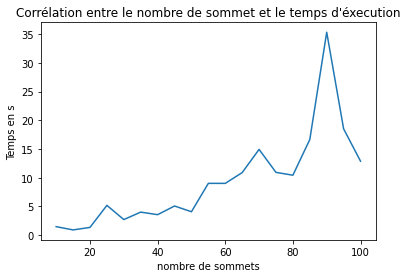

In [59]:
def generation_stats_heuristic():
    nb_vertex_start = int(input("nombre de sommets de départ : "))
    nb_vertex_end = int(input("nombre de sommets de fin : "))
    step = int(input("pas : "))
    list_result = []
    list_vertex = []
    current_nb_vertex = nb_vertex_start
    for i in range(math.ceil((nb_vertex_end - nb_vertex_start) / step) + 1):
        matrix = matrix_generation(current_nb_vertex, 50)
        weighted_matrix = weighting_graph(matrix)
        empty_collection(global_collection)
        fill_bdd(global_collection, weighted_matrix)
        back_tracking = BackTracking(global_collection)
        initial_cycle = back_tracking.back_tracking(0)
        start = time.time()
        find_local_optimum(global_collection, initial_cycle, 15, [])
        list_result.append(time.time() - start)
        list_vertex.append(current_nb_vertex)
        current_nb_vertex += step
    plt.title("Corrélation entre le nombre de sommet et le temps d'éxecution")
    plt.xlabel('nombre de sommets')
    plt.ylabel('Temps en s')
    plt.plot(list_vertex, list_result)
    plt.show()
    
    
generation_stats_heuristic()

----

### 2ème test :

Avec notre 2ème étude, cette fois-ci nous avons choisi de faire varier la densité de la matrice afin d'obtenir une diminution dans le temps d'exécution et de pouvoir observer l'évolution.
Dans ce cas, notre nombre de villes reste fixé à 50 et nous allons augmenter notre densité de 10 en 10, en partant de 50% jusqu'à 100%, en suppriment les diagonales inutiles, tout cela avec 10 itérations.
On observe donc, une forte diminution dans le temps d'exécution plus la densité est haute, car plus la densité est haute, moins nous avons de chemin à trouvé, cependant comme pour la première étude, il se peut que parfois, nous tombions par chance sur l'optimum local et il ne cherche donc pas ses voisins, on se retrouve donc avec de légèrement augmentation dans la courbe.

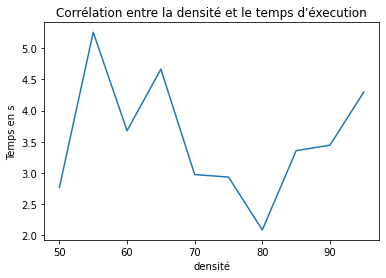

In [75]:
def generation_stats_densite_heuristic():
    
    list_result = []
    list_vertex = []
    current_denity = 50
    for i in range(10):
        matrix = matrix_generation(50, current_denity)
        weighted_matrix = weighting_graph(matrix)
        empty_collection(global_collection)
        fill_bdd(global_collection, weighted_matrix)
        back_tracking = BackTracking(global_collection)
        initial_cycle = back_tracking.back_tracking(0)
        start = time.time()
        find_local_optimum(global_collection, initial_cycle, 15, [])
        list_result.append(time.time() - start)
        list_vertex.append(current_denity)
        current_denity += 5
    plt.title("Corrélation entre la densité et le temps d'éxecution")
    plt.xlabel('densité')
    plt.ylabel('Temps en s')
    plt.plot(list_vertex, list_result)
    plt.show()
    
    
generation_stats_densite_heuristic()

### 3ème test :

Pour notre troisième étude, nous avons exactement les mêmes paramètres que pour la première étude faite en heuristique, cette fois-ci elle est en méta-heuristique, donc nous ne prendrons pas l'optimum local, mais global

nombre de sommets de départ :  10
nombre de sommets de fin :  100
pas :  10


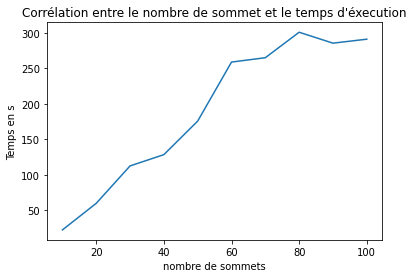

In [73]:
def generation_stats_meta_heuristic_vertex():
    nb_vertex_start = int(input("nombre de sommets de départ : "))
    nb_vertex_end = int(input("nombre de sommets de fin : "))
    step = int(input("pas : "))
    list_result = []
    list_vertex = []
    current_nb_vertex = nb_vertex_start
    for i in range(math.ceil((nb_vertex_end - nb_vertex_start) / step) + 1):
        matrix = matrix_generation(current_nb_vertex, 50)
        weighted_matrix = weighting_graph(matrix)
        empty_collection(global_collection)
        fill_bdd(global_collection, weighted_matrix)
        back_tracking = BackTracking(global_collection)
        initial_cycle = back_tracking.back_tracking(0)
        start = time.time()
        meta_tabou_opti(global_collection, initial_cycle)
        list_result.append(time.time() - start)
        list_vertex.append(current_nb_vertex)
        current_nb_vertex += step
    plt.title("Corrélation entre le nombre de sommet et le temps d'éxecution")
    plt.xlabel('nombre de sommets')
    plt.ylabel('Temps en s')
    plt.plot(list_vertex, list_result)
    plt.show()
    
    
generation_stats_meta_heuristic_vertex()

### Observation 1

En comparent les résultats de la première étude avec celle-ci, on peut observer que pour les mêmes paramètres d'entrées, la courbe de la méta heuristique est nettement plus lisse. On observe que les paramètres influent plus sur la complexité temporelle que lors de la recherche heuristique. D'après les données récoltées plus le nombre de sommet est grand plus le temps d'exécution du programme est grand.

Les résultats obtenus semblent être assez représentatifs du comportement normal d'une recherche heuristique et d'une recherche méta heuristique.

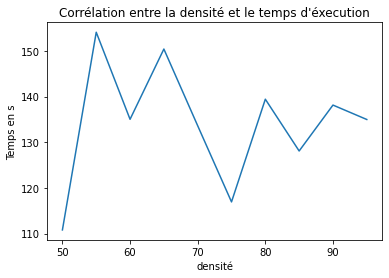

In [76]:
def generation_stats_densite_heuristic():
    
    list_result = []
    list_vertex = []
    current_denity = 50
    for i in range(10):
        matrix = matrix_generation(50, current_denity)
        weighted_matrix = weighting_graph(matrix)
        empty_collection(global_collection)
        fill_bdd(global_collection, weighted_matrix)
        back_tracking = BackTracking(global_collection)
        initial_cycle = back_tracking.back_tracking(0)
        start = time.time()
        meta_tabou_opti(global_collection, initial_cycle)
        list_result.append(time.time() - start)
        list_vertex.append(current_denity)
        current_denity += 5
    plt.title("Corrélation entre la densité et le temps d'éxecution")
    plt.xlabel('densité')
    plt.ylabel('Temps en s')
    plt.plot(list_vertex, list_result)
    plt.show()
    
    
generation_stats_densite_heuristic()

### Observation 2

En comparant les résultats de la deuxième étude avec cette étude, on peut observer une baisse du temps d'exécution sur la même plage de densité. Il semblerait donc qu'une certaine densité entre 75% et 85% nous permettrais de réduire le temps d'exécution. Cela pourrait s'expliquer par le fait qu'une densité trop faible rend la recherche de voisin plus complexe et à l'inverse qu'une densité trop forte proposerait trop de nouvelles solutions peu intéressantes.